<a href="https://colab.research.google.com/github/Siji-Jaimal/Siji-Jaimal/blob/main/IMDb_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
kaggle_dictionary = json.load(open("kaggle.json"))

In [4]:
kaggle_dictionary.keys()

dict_keys(['username', 'key'])

In [5]:
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

In [6]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 19% 5.00M/25.7M [00:00<00:00, 46.0MB/s]
100% 25.7M/25.7M [00:00<00:00, 151MB/s] 


In [7]:
!ls

imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  sample_data


In [8]:
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
  zip_ref.extractall()

In [9]:
!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   kaggle.json   sample_data


In [12]:
data = pd.read_csv("/content/IMDB Dataset.csv")

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
data.shape

(50000, 2)

In [13]:
data["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [16]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [17]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [18]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [19]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [20]:
data["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [21]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [22]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


In [23]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [24]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [25]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [26]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [27]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [32]:
print(X_train)


print("*****Test Data****")


print(X_test)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]
*****Test Data****
[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [36]:
print(X_train)

print("\033[1m********Test Data**********\033[0m")

print(X_test)


[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]
********Test Data**********
[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [37]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [41]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.8756 - loss: 0.3090
Test Loss: 0.3056490123271942
Test Accuracy: 0.8772000074386597


In [71]:
import numpy as np

# Convert X_train and Y_train to NumPy arrays if they aren't already
X_train = np.array(X_train)
Y_train = np.array(Y_train)

history = model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.5093 - loss: 0.7310 - val_accuracy: 0.5036 - val_loss: 0.6935
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 187ms/step - accuracy: 0.5714 - loss: 0.6851 - val_accuracy: 0.4864 - val_loss: 0.7052
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 182ms/step - accuracy: 0.6433 - loss: 0.6332 - val_accuracy: 0.4902 - val_loss: 0.7429
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 180ms/step - accuracy: 0.7319 - loss: 0.5303 - val_accuracy: 0.4966 - val_loss: 0.8294
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 180ms/step - accuracy: 0.7994 - loss: 0.4272 - val_accuracy: 0.4966 - val_loss: 0.9550


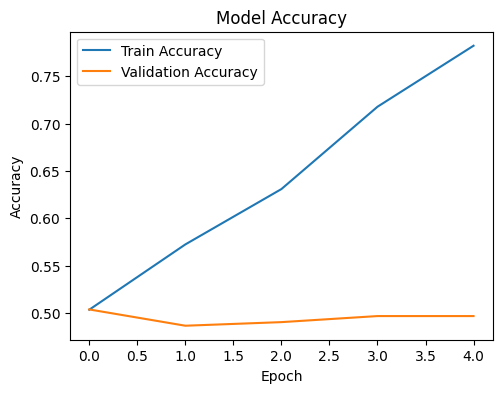

In [73]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

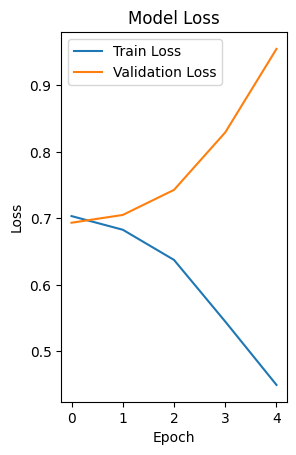

In [74]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [68]:
plt.show()

In [44]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'X_test', 'Y_test' are your test data
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary predictions (0 or 1)
y_true = Y_test  # Assuming Y_test contains the true labels

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step
Accuracy: 0.88


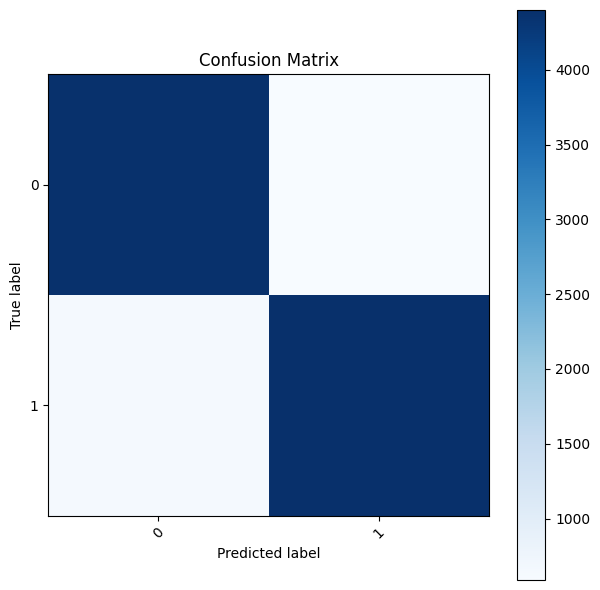

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_true)))
plt.xticks(tick_marks, rotation=45)
plt.yticks(tick_marks)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [46]:
# Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Precision: 0.88
Recall: 0.88
F1-Score: 0.88


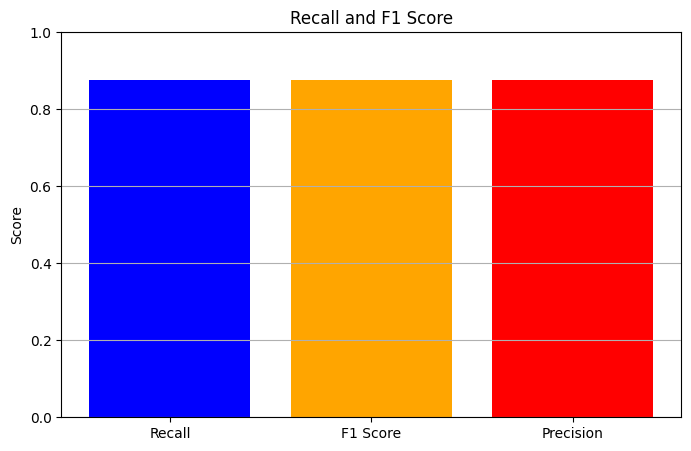

In [78]:
metrics = ['Recall', 'F1 Score','Precision']
values = [recall, f1,precision]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange','red'])
plt.ylim(0, 1)
plt.title('Recall and F1 Score')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

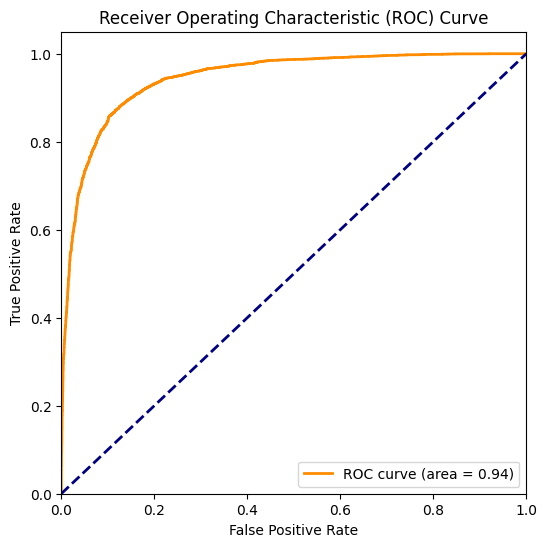

AUC-ROC Score: 0.94


In [47]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true.ravel(), y_pred_probs.ravel())  # Flatten arrays for roc_curve
roc_auc = roc_auc_score(y_true, y_pred_probs)  # Use probabilities for AUC

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC Score: {roc_auc:.2f}")

In [83]:
import matplotlib.pyplot as plt
from collections import Counter

reviews = data['review'].values
sentiments = np.where(data['sentiment'] == 'positive', 1, 0)  # Encode sentiments

#if 'genre' in data.columns:
    #genres = data['genre'].values
#else:
    #print("Warning: 'genre' column not found in DataFrame. Skipping genre analysis.")
    #genres = None


# Extract prevalent themes
def extract_themes(reviews, sentiments):
    positive_reviews = reviews[sentiments == 1]
    negative_reviews = reviews[sentiments == 0]

    # Extract keywords from positive reviews
    positive_words = [word for review in positive_reviews for word in review.split()]
    positive_themes = Counter(positive_words).most_common(10)

    # Extract keywords from negative reviews
    negative_words = [word for review in negative_reviews for word in review.split()]
    negative_themes = Counter(negative_words).most_common(10)

    # Analyze themes by genre


    return positive_themes, negative_themes

# Call the function to extract themes
positive_themes, negative_themes = extract_themes(data['review'].values, sentiments)

# Print the results
print("Prevalent Themes in Positive Reviews:")
print(positive_themes)

print("\nPrevalent Themes in Negative Reviews:")
print(negative_themes)



Prevalent Themes in Positive Reviews:
[]

Prevalent Themes in Negative Reviews:
[('the', 568735), ('a', 306960), ('and', 301919), ('of', 283625), ('to', 261850), ('is', 203056), ('in', 169981), ('I', 132498), ('that', 126818), ('this', 113726)]


In [85]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

Most Common Positive Words:
[('the', 340558), ('?', 184206), ('and', 176578), ('a', 164221), ('of', 152096), ('to', 131300), ('is', 111812), ('in', 99191), ('br', 97954), ('it', 78115), ('i', 73109), ('this', 69619), ('that', 66817), ('as', 51092), ('with', 45708), ('for', 44225), ('was', 43328), ('film', 40997), ('but', 40699), ('movie', 37451)]

Most Common Negative Words:
[('the', 326199), ('?', 168862), ('a', 158579), ('and', 147759), ('of', 137283), ('to', 136779), ('br', 103997), ('is', 99229), ('in', 87499), ('i', 81778), ('this', 81322), ('it', 78686), ('that', 70169), ('was', 52257), ('movie', 49599), ('for', 43225), ('but', 42796), ('with', 41642), ('as', 40638), ('film', 36681)]


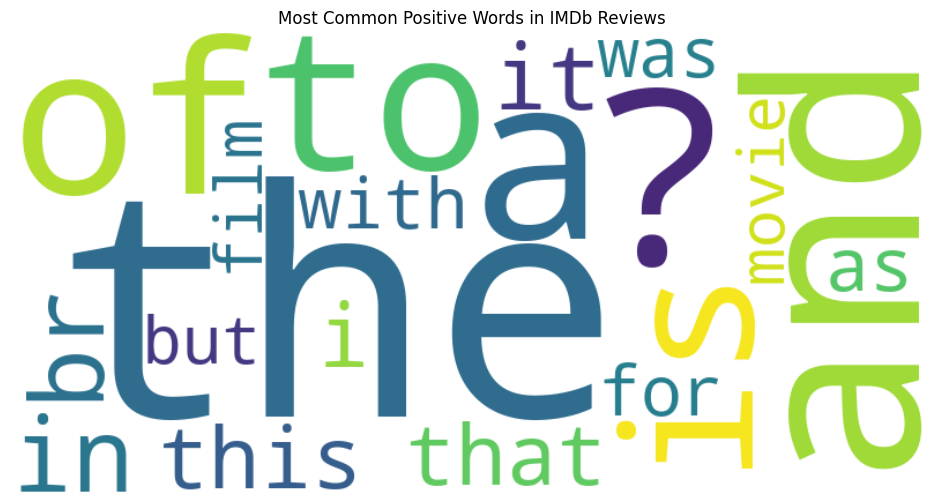

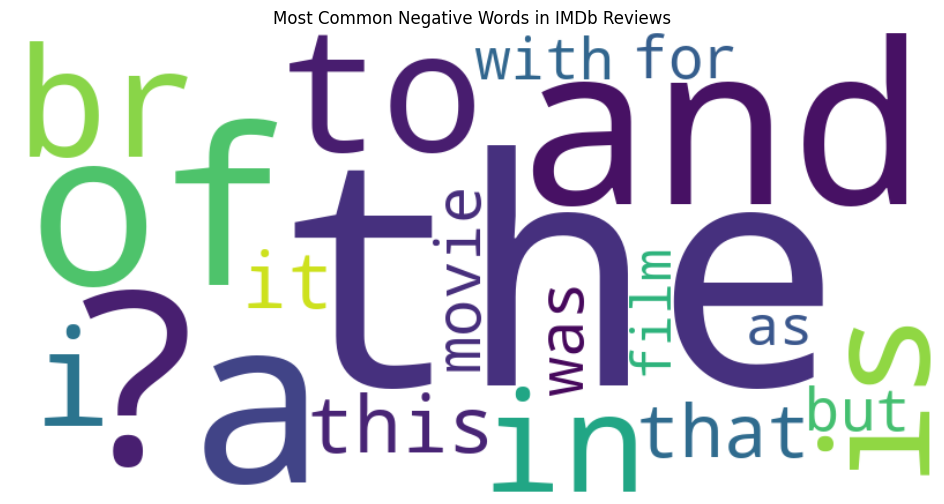

In [88]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from tensorflow import keras

max_features = 20000

# Load the IMDB dataset and obtain the word index
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)
word_index = keras.datasets.imdb.get_word_index()  # Get word index from the IMDB dataset

# Create a reverse mapping from integer to word
reverse_word_index = {value: key for key, value in word_index.items()}
reverse_word_index[0] = '<PAD>'  # Padding token
# Function to decode reviews
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Decode the training and test reviews
decoded_train_reviews = [decode_review(review) for review in X_train]
decoded_test_reviews = [decode_review(review) for review in X_test]

# Combine the reviews and sentiments for analysis
all_reviews = decoded_train_reviews + decoded_test_reviews
all_labels = np.concatenate((y_train, y_test))

# Function to extract common words for each sentiment
def extract_common_words(reviews, labels):
    positive_words = []
    negative_words = []

    for review, label in zip(reviews, labels):
        words = review.split()
        if label == 1:  # Positive sentiment
            positive_words.extend(words)
        else:  # Negative sentiment
            negative_words.extend(words)

    return positive_words, negative_words

# Extract common words
positive_words, negative_words = extract_common_words(all_reviews, all_labels)

# Count the most common words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the 20 most common words for each sentiment
most_common_positive = positive_word_counts.most_common(20)
most_common_negative = negative_word_counts.most_common(20)

# Print the most common words
print("Most Common Positive Words:")
print(most_common_positive)

print("\nMost Common Negative Words:")
print(most_common_negative)

# Visualize the most common positive words using WordCloud
plt.figure(figsize=(12, 6))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate_from_frequencies(dict(most_common_positive))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Words in IMDb Reviews')
plt.show()

# Visualize the most common negative words using WordCloud
plt.figure(figsize=(12, 6))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate_from_frequencies(dict(most_common_negative))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Words in IMDb Reviews')
plt.show()

In [90]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter

In [91]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Most Common POS Tags in Positive Reviews:
[('NN', 1115870), ('JJ', 482445), ('NNS', 253623), ('RB', 251307), ('.', 184206), ('VB', 170602), ('VBZ', 125158), ('VBN', 110888), ('VBG', 100553), ('VBP', 88162)]

Most Common POS Tags in Negative Reviews:
[('NN', 1067173), ('JJ', 455922), ('RB', 268372), ('NNS', 237373), ('VB', 189643), ('.', 168862), ('VBZ', 116467), ('VBN', 110853), ('VBG', 109244), ('VBP', 91325)]


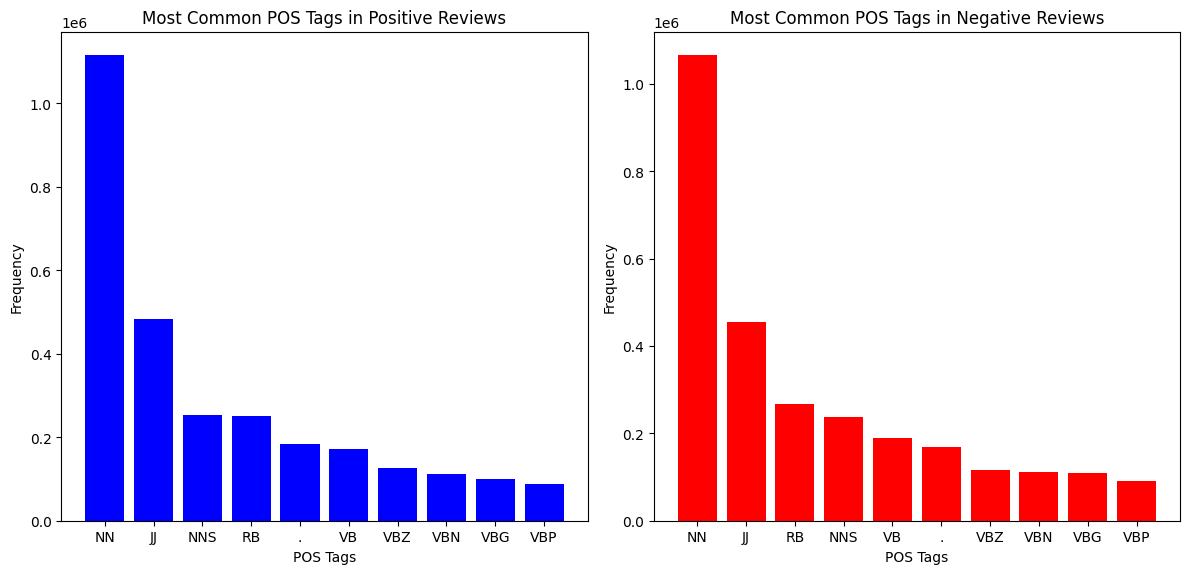

In [92]:
def extract_linguistic_features(reviews, labels):
    positive_features = []
    negative_features = []

    for review, label in zip(reviews, labels):
        words = word_tokenize(review)
        pos_tags = pos_tag(words)

        # Filter out stopwords and keep POS tags
        filtered_tags = [(word, tag) for word, tag in pos_tags if word.lower() not in stopwords.words('english')]

        if label == 1:  # Positive sentiment
            positive_features.extend(filtered_tags)
        else:  # Negative sentiment
            negative_features.extend(filtered_tags)

    return positive_features, negative_features

# Extract linguistic features
positive_features, negative_features = extract_linguistic_features(all_reviews, all_labels)

# Count the most common POS tags for positive and negative sentiments
positive_pos_counts = Counter(tag for word, tag in positive_features)
negative_pos_counts = Counter(tag for word, tag in negative_features)

# Get the 10 most common POS tags for each sentiment
most_common_positive = positive_pos_counts.most_common(10)
most_common_negative = negative_pos_counts.most_common(10)

# Print the most common POS tags
print("Most Common POS Tags in Positive Reviews:")
print(most_common_positive)

print("\nMost Common POS Tags in Negative Reviews:")
print(most_common_negative)

# Visualize the most common POS tags using bar plots
labels_pos, counts_pos = zip(*most_common_positive)
labels_neg, counts_neg = zip(*most_common_negative)

plt.figure(figsize=(12, 6))

# Positive POS tags
plt.subplot(1, 2, 1)
plt.bar(labels_pos, counts_pos, color='blue')
plt.title('Most Common POS Tags in Positive Reviews')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')

# Negative POS tags
plt.subplot(1, 2, 2)
plt.bar(labels_neg, counts_neg, color='red')
plt.title('Most Common POS Tags in Negative Reviews')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [94]:
review_lengths = [len(review) for review in X_train]

# Find the maximum review length
max_review_length = max(review_lengths)

print(f'Maximum Review Length: {max_review_length}')



Maximum Review Length: 2494


In [95]:
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

# Print the shapes of the padded data
print("Padded Training Data Shape:", X_train.shape)
print("Padded Test Data Shape:", X_test.shape)

Padded Training Data Shape: (25000, 100)
Padded Test Data Shape: (25000, 100)


In [96]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [97]:
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
The sentiment of the review is: negative


In [98]:
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
The sentiment of the review is: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
The sentiment of the review is: negative


In [99]:
from bs4 import BeautifulSoup
import re

In [100]:
def clean_html(text):
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [103]:
from bs4 import BeautifulSoup
import re

def clean_html(text):
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

cleaned_train_reviews = [clean_html(decode_review(review)) for review in X_train]
cleaned_test_reviews = [clean_html(decode_review(review)) for review in X_test]

print("Sample Cleaned Review:", cleaned_train_reviews[0])

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Fixed indentation for the second definition
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

cleaned_train_reviews = [preprocess_text(review) for review in cleaned_train_reviews]
cleaned_test_reviews = [preprocess_text(review) for review in cleaned_test_reviews]

print("Sample Preprocessed Review:", cleaned_train_reviews[0])

Sample Cleaned Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was
Sample Preprocessed Review:  this film was just brilliant casting location scenery story direction everyones really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so m

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import re

# Sample IMDb data
data = {
    'review': [
        'Great movie! Highly recommend it. <br> [Spoiler: The ending is amazing]',
        'Bad movie. Would not watch again. <br> [Critics: Terrible acting]',
        'Great movie! <br> Really enjoyed it. [Note: This is a must-watch]',
        'Bad movie. <br> Terrible acting! [Warning: Not suitable for kids]',
        'Great movie! Highly recommend it. <br> [Spoiler: The plot twist is great]'
    ]
}

imdb_data = pd.DataFrame(data)

# Function to strip HTML tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove text within square brackets
def remove_between_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

# Function to denoise text
def denoise_text(text):
    text = strip_html(text)  # Remove HTML tags
    text = remove_between_square_brackets(text)  # Remove text within square brackets
    return text

# Apply the denoise function on the review column
imdb_data['review'] = imdb_data['review'].apply(denoise_text)

# Display the cleaned DataFrame
print("Cleaned IMDb Data:")
print(imdb_data)


Cleaned IMDb Data:
                                review
0  Great movie! Highly recommend it.  
1  Bad movie. Would not watch again.  
2    Great movie!  Really enjoyed it. 
3        Bad movie.  Terrible acting! 
4  Great movie! Highly recommend it.  


In [5]:
# Import necessary libraries (assuming you're using TensorFlow/Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define your model architecture
model = Sequential()
model.add(Embedding(10000, 128))  # Example embedding layer
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can fit the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

pd.DataFrame(history.history).plot()

NameError: name 'X_train' is not defined

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.4333 - loss: 0.6944 - val_accuracy: 0.6500 - val_loss: 0.6909
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.8341 - loss: 0.6768 - val_accuracy: 0.6000 - val_loss: 0.6856
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.7020 - loss: 0.6400 - val_accuracy: 0.6000 - val_loss: 0.6779
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.5716 - loss: 0.5936 - val_accuracy: 0.6000 - val_loss: 0.6864
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.9845 - loss: 0.4465 - val_accuracy: 0.6000 - val_loss: 0.6838


<Axes: >

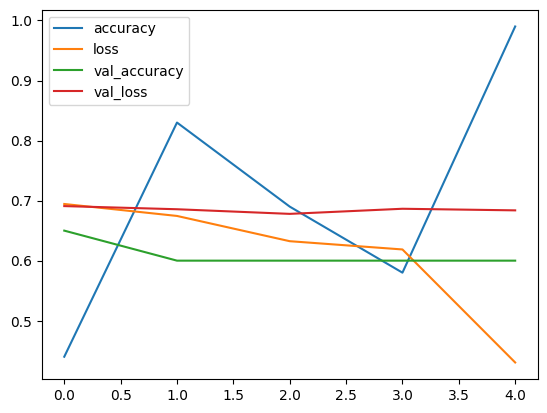

In [7]:
# Import necessary libraries (assuming you're using TensorFlow/Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np # Import numpy for array manipulation

# Define your model architecture
model = Sequential()
model.add(Embedding(10000, 128))  # Example embedding layer
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load or create your training data here
# Example with placeholder data
X_train = np.random.randint(10000, size=(100, 100)) # Replace with your actual data
y_train = np.random.randint(2, size=(100, 1)) # Replace with your actual labels
X_val = np.random.randint(10000, size=(20, 100)) # Replace with your actual validation data
y_val = np.random.randint(2, size=(20, 1)) # Replace with your actual validation labels

# Now you can fit the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

pd.DataFrame(history.history).plot()

**Modified LSTM**

In [9]:
!pip install tensorflow
import tensorflow.keras as keras

embed_size = 64
model_v2 = keras.models.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=embed_size, input_shape=[None], mask_zero=True),
    keras.layers.SpatialDropout1D(0.2),
    keras.layers.LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model_v2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, None, 64)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.6810 - loss: 0.6893 - val_accuracy: 0.6000 - val_loss: 0.6915
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6625 - loss: 0.6892 - val_accuracy: 0.6500 - val_loss: 0.6912
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6483 - loss: 0.6878 - val_accuracy: 0.6500 - val_loss: 0.6910
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.6773 - loss: 0.6876 - val_accuracy: 0.6000 - val_loss: 0.6908
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.6854 - loss: 0.6865 - val_accuracy: 0.6000 - val_loss: 0.6905


<Axes: >

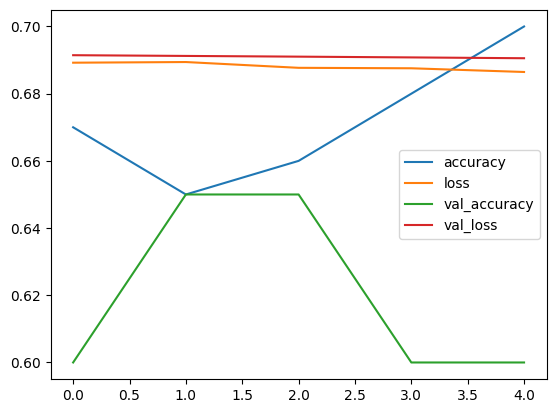

In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model_v2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model_v2.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping_cb]) # Changed y_valid to y_val

pd.DataFrame(history.history).plot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


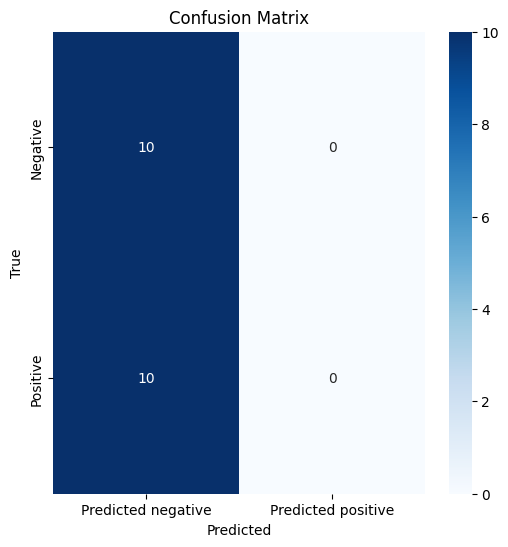

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
!pip install seaborn
import seaborn as sns # Import the Seaborn library

import sklearn.metrics as metrics # Import the metrics module

X_test = np.random.randint(10000, size=(20, 100)) # Replace with your actual test data
y_test = np.random.randint(2, size=(20, 1)) # Replace with your actual test labels

y_pred_probs = model_v2.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate the confusion matrix and store it in 'cm'
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
# Use Seaborn's 'Blues' colormap
sns.heatmap(cm,
            annot=True, fmt='.0f', cmap='Blues',
            xticklabels=['Predicted negative', 'Predicted positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




print(metrics.classification_report(y_test, y_pred)) # Use metrics.classification_report

782/782 ━━━━━━━━━━━━━━━━━━━━ 232s 296ms/step
              precision    recall  f1-score   support

           0       0.50      0.94      0.65     12500
           1       0.53      0.07      0.13     12500

    accuracy                           0.50     25000
   macro avg       0.52      0.50      0.39     25000
weighted avg       0.52      0.50      0.39     25000



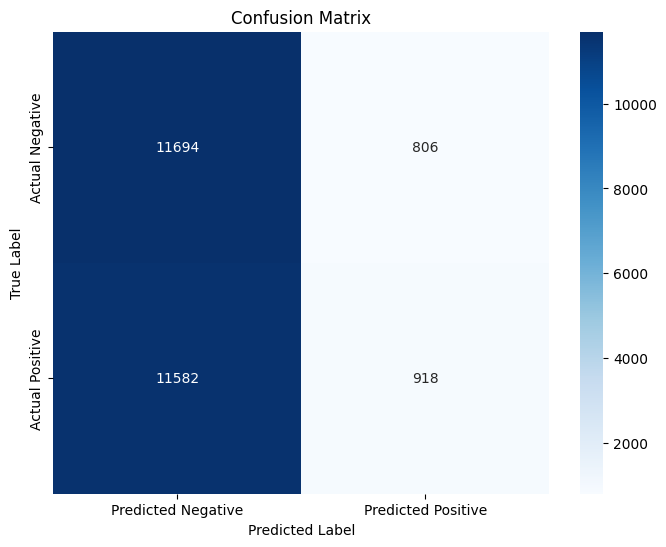

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.metrics import classification_report, confusion_matrix

# Load the IMDb dataset
max_features = 20000  # Number of words to consider as features
maxlen = 500  # Maximum review length
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')



# Make predictions
y_pred_prob = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary class labels

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.0f',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'],
            cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
